<a href="https://colab.research.google.com/github/kavithabakshi/ADNI/blob/master/ADNI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ganesha
import cv2
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam, RMSprop
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import nibabel as nib #reading MRI images
#from sklearn.cross_validation import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import glob

Using TensorFlow backend.


In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 

     |████████████████████████████████| 993kB 2.8MB/s 
1JWZGDUIC6JGNG8s6NuRPNk534Qpr2Dru


In [3]:
ADNI_csv = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019.csv'
df = pd.read_csv(ADNI_csv, delimiter= ',')
print(df.info())
filename = df['FileName']
print(len(filename))
images = []
for f in range(len(filename)):
    downloaded.GetContentFile(filename[f])  
    a = nib.load(filename[f])
    a = a.get_data()
    for i in range(a.shape[1]):
        images.append((a[:,i,:]))
      #images.append(a)
#print (a.shape)
#a[:,0,:].shape
images = np.asarray(images)
images.shape
images = images.reshape(-1, 192,160,1)
print(images.shape)
m = np.max(images)
mi = np.min(images)
images = (images - mi) / (m - mi)
np.min(images), np.max(images)
print("Dataset (images) shape: {shape}".format(shape=images.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
FileName         6 non-null object
Image Data ID    6 non-null int64
Subject          6 non-null object
Group            6 non-null object
Sex              6 non-null object
Age              6 non-null int64
Visit            6 non-null int64
Modality         6 non-null object
Description      6 non-null object
Type             6 non-null object
Acq Date         6 non-null object
Format           6 non-null object
Downloaded       1 non-null object
dtypes: int64(3), object(10)
memory usage: 704.0+ bytes
None
6
(1152, 192, 160, 1)
Dataset (images) shape: (1152, 192, 160, 1)


In [4]:
ADNI_csv = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019.csv'
df = pd.read_csv(ADNI_csv, delimiter= ',')
print(df.info())
filename = df['FileName']
print(len(filename))
images = []
data = []
for f in range(len(filename)):
  downloaded.GetContentFile(filename[f])  
  a = nib.load(filename[f])
  a = a.get_data()
  #images = cv2.resize(a, (192, 160))
  data.append(a)
#print(images.shape)
images = np.array(data, dtype="float") / 255.0
print("Dataset (images) shape: {shape}".format(shape=images.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
FileName         6 non-null object
Image Data ID    6 non-null int64
Subject          6 non-null object
Group            6 non-null object
Sex              6 non-null object
Age              6 non-null int64
Visit            6 non-null int64
Modality         6 non-null object
Description      6 non-null object
Type             6 non-null object
Acq Date         6 non-null object
Format           6 non-null object
Downloaded       1 non-null object
dtypes: int64(3), object(10)
memory usage: 704.0+ bytes
None
6
Dataset (images) shape: (6, 192, 192, 160)


In [5]:
ADNI_csv1 = 'https://raw.githubusercontent.com/kavithabakshi/ADNI/master/ADNI1_Complete_1Yr_1.5T_4_14_2019%20_test.csv'
df1 = pd.read_csv(ADNI_csv1, delimiter= ',')
print(df1.info())
filename = df1['FileName']
print(len(filename))
images1 = []
data1 = []
for f in range(len(filename)):
  downloaded.GetContentFile(filename[f])  
  a1 = nib.load(filename[f])
  a1 = a1.get_data()
  #images = cv2.resize(a, (192, 160))
  data1.append(a1)
#print(images.shape)
images1 = np.array(data1, dtype="float") / 255.0
print("Dataset (images) shape: {shape}".format(shape=images1.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 13 columns):
FileName         3 non-null object
Image Data ID    3 non-null int64
Subject          3 non-null object
Group            3 non-null object
Sex              3 non-null object
Age              3 non-null int64
Visit            3 non-null int64
Modality         3 non-null object
Description      3 non-null object
Type             3 non-null object
Acq Date         3 non-null object
Format           3 non-null object
Downloaded       0 non-null float64
dtypes: float64(1), int64(3), object(9)
memory usage: 392.0+ bytes
None
3
Dataset (images) shape: (3, 192, 192, 160)


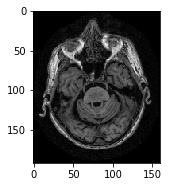

In [24]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = images[1,115]
plt.imshow(curr_img, cmap='gray')



In [0]:
from sklearn import preprocessing
from keras.layers import AveragePooling2D
batch_size = 3
epochs = 10
inChannel = 160
x, y = 192, 192
n = []
#print(input_img.shape)
input_img = Input(shape = (x, y, inChannel))
print(input_img.shape)
Y = df.Group.value_counts()
Y = df['Group']
Y = Y.values.reshape(-1, 1)
ohe = preprocessing.OneHotEncoder()
ohe.fit(Y)
Y = ohe.transform(Y)
Y1 = df1.Group.value_counts()
Y1 = df1['Group']
Y1 = Y1.values.reshape(-1, 1)
ohe = preprocessing.OneHotEncoder()
ohe.fit(Y1)
Y1 = ohe.transform(Y1)
#model = Sequential()
# Add a convolutional layer
def lenet5(input_img):
  conv1 = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img) 
  pool1 = AveragePooling2D(10)(conv1)
  conv2 = Conv2D(16, (3, 3), activation='relu', padding='same')(pool1)
  pool2 = AveragePooling2D(10)(conv2)
  flat = Flatten()(pool2)
  dense1 = Dense(120)(flat)
  dense2 = Dense(60)(dense1)
  dense3 = Dense(3)(dense2)
  return dense3
lenet5 = Model(input_img, lenet5(input_img))
lenet5.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
score = lenet5.fit(images, Y, batch_size=batch_size,epochs=epochs,verbose=1, validation_data=(images1, Y1))
#score = lenet5.evaluate(images1, Y1, batch_size=3)
print(score)

(?, 192, 192, 160)
Train on 6 samples, validate on 3 samples
Epoch 1/10
6/6 [==============================] - 7s 1s/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 2/10
6/6 [==============================] - 6s 975ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 3/10
6/6 [==============================] - 6s 979ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 4/10
6/6 [==============================] - 6s 981ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 5/10
6/6 [==============================] - 6s 986ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 6/10
6/6 [==============================] - 6s 977ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 7/10
6/6 [==============================] - 6s 978ms/step - loss: 5.3727 - acc: 0.3333 - val_loss: 5.3727 - val_acc: 0.3333
Epoch 8/10
6/6 [================